In [10]:
import numpy as np
import pandas as pd

### Notebook demo for amageddon.solver

In this notebook we will make a comparison between our software output and the analytical solution, which is derived with the simplifying assumptions of exponential atmosphere ($\rho_a = \rho_0 e^{-z/H}$), no gravitational acceleration ($g=0$), a flat planet ($R_p = \infty$), no lift ($C_L = 0$), no mass change owing to ablation ($\frac{dm}{dt}=0$) and no fragmentation ($\sigma_0 = \infty$, $\frac{dr}{dt}=0$). Under these assumptions, the system of ODEs only remains $\frac{dv}{dt}$ and $\frac{dz}{dt}$. We will derive the distance by applying: $$x_{i+1} = x_i + \frac{\Delta z}{tan \theta}$$  

To simple the analysis process we will apply forward euler method to derivate the result of analytical solution.

In [11]:
rho_0 = 1.2 #density of air
Q = 10**7 
H = 8000
C_d = 1
g = 9.81
#setting para for the asteroids ：
r0 = 50
v0 = 19.2e3
rho_m = 3300
theta0 = 18.3
m0 = (4/3)*np.pi*r0**3*rho_m
x0 = 0.
z0 = 100000.
A = np.pi*r0**2  
sin_theta = np.sin(theta0*np.pi/180)
cos_theta = np.cos(theta0*np.pi/180)
tan_theta = np.tan(theta0*np.pi/180)

def euler(tmax,dt) :
    global v,z,x,t
    t = np.linspace(0,tmax,int(tmax/dt)+1)
    v = np.zeros(len(t))
    z = np.zeros(len(t))
    x = np.zeros(len(t))
    v[0] = v0
    z[0] = z0
    for i in range(len(t)-1):
        rho_a = rho_0*np.exp(-z[i]/H)
        v[i+1] = v[i] + dt * (-((C_d*rho_a*A*v[i]**2)/(2*m0))+ g*sin_theta)
        z[i+1] = z[i] + dt * (-v[i]*sin_theta)
        x[i+1] = x[i] + dt* v[i] * cos_theta
      
    

In [12]:
import matplotlib.pyplot as plt
tmax = 10
dt = 0.05
euler(tmax, dt)

In [13]:
z = pd.Series(z)
x = pd.Series(x)

In [14]:
from armageddon import solver
a = solver.Planet()
b = a.solve_atmospheric_entry(radius=r0, velocity=v0, density=rho_m, strength =1e7, angle=theta0)

In [15]:
n = int(tmax/dt)+1
x1 = b['distance'].head(n)
z1 = b['altitude'].head(n)

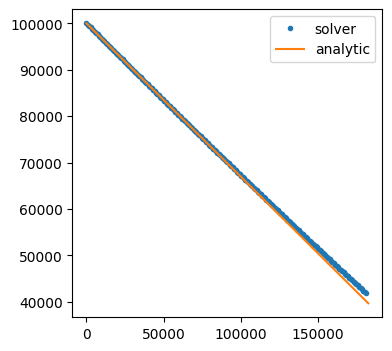

In [16]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(x1,z1,'.',label='solver') # plot the point (2,3,4) on the figure
ax.plot(x,z,'-',label = 'analytic')
ax.legend()
plt.show()

From the figure we can observe that in the first few seconds, our solver perfectly matches the result of the analytical solutions.